In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing data into jupyter notebook
data=pd.read_csv('adult.csv',header=None)

EDA - Looking for trends in data

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.columns=['Age','WorkClass','fnlwgt','Education','Education-Num','Marital Status','Occupation','Relationship','Race','Sex','Capital-Gain','Capital-Loss','Hours-Per-Week','Native-Country','Salary']

In [6]:
#Removing trailing spaces in the data columns
temp=['WorkClass','Marital Status','Occupation','Relationship','Race','Sex','Native-Country']
for i in temp: 
    data[i]=data[i].str.lstrip()

In [7]:
data

,Age,WorkClass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
#Univariate and Multivariate Analysis - EDA

In [9]:
data.dtypes

Age                int64
WorkClass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-Per-Week     int64
Native-Country    object
Salary            object
dtype: object

In [10]:
data.isnull().sum()

Age               0
WorkClass         0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Salary            0
dtype: int64

In [11]:
data['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

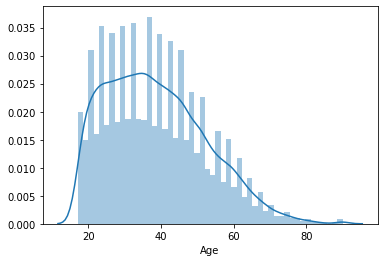

In [12]:
sns.distplot(data['Age'])

In [13]:
data['WorkClass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: WorkClass, dtype: int64

In [14]:
data['WorkClass'].replace('?','Private',inplace=True)

In [15]:
data['WorkClass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
data['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [17]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [18]:
data['Education-Num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-Num, dtype: int64

In [19]:
#Dropping the education field as it is same as the Education Number
data.drop(['Education'],axis=1,inplace=True)

In [20]:
data

,Age,WorkClass,fnlwgt,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
data['Marital Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [22]:
data['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [23]:
data['Occupation'].replace('?','Not Specified',inplace=True)

In [24]:
data['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Not Specified        1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [25]:
data['Relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [26]:
data['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [27]:
data['Sex'].value_counts()

Male      21790
Female    10771
Name: Sex, dtype: int64

In [28]:
data['Native-Country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [29]:
data['Native-Country'].replace('?','Not Specified',inplace=True)

In [30]:
data['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [31]:
#New column created for salary to show 1 if salary is greater and 0 if lesser, so the original column can be dropped

In [32]:
data['Salary >50K']=np.where(data['Salary']==" <=50K", '0','1')

In [33]:
data['Salary >50K'].value_counts()

0    24720
1     7841
Name: Salary >50K, dtype: int64

In [34]:
data.drop(['Salary'],axis=1,inplace=True)

In [35]:
data

,Age,WorkClass,fnlwgt,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary >50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [36]:
data.dtypes

Age                int64
WorkClass         object
fnlwgt             int64
Education-Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-Per-Week     int64
Native-Country    object
Salary >50K       object
dtype: object

In [37]:
#Datatype conversion
data['Salary >50K']=data['Salary >50K'].astype(int)

In [38]:
data.dtypes

Age                int64
WorkClass         object
fnlwgt             int64
Education-Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-Per-Week     int64
Native-Country    object
Salary >50K        int32
dtype: object

In [39]:
#Checking the correlation of the data
data.corr()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Salary >50K
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital-Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital-Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours-Per-Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
Salary >50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [40]:
data.isin(['?']).sum()

Age               0
WorkClass         0
fnlwgt            0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Salary >50K       0
dtype: int64

Data Visualisation - Looking for trends 

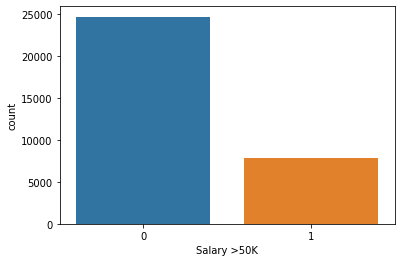

In [41]:
sns.countplot(data['Salary >50K'])

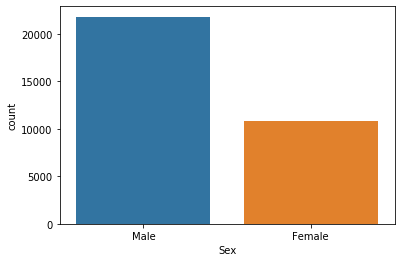

In [42]:
sns.countplot(data['Sex'])

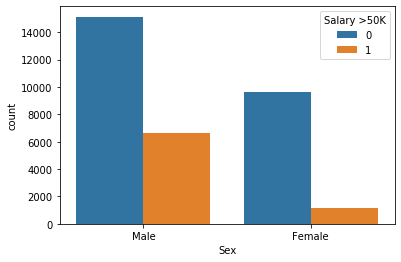

In [43]:
sns.countplot(data['Sex'],hue=data['Salary >50K'])

In [44]:
#It is evident that majority of the people earning more than 50 grand are Men
#Majority of the population earn less than 50 grand

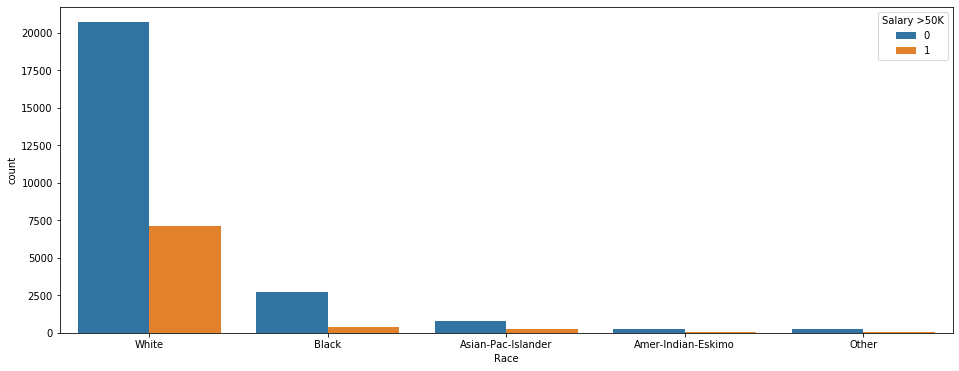

In [45]:
plt.figure(figsize=(16,6))
sns.countplot(data['Race'],hue=data['Salary >50K'])

In [46]:
#It is also observed that the majority of the data collected is for the white population

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

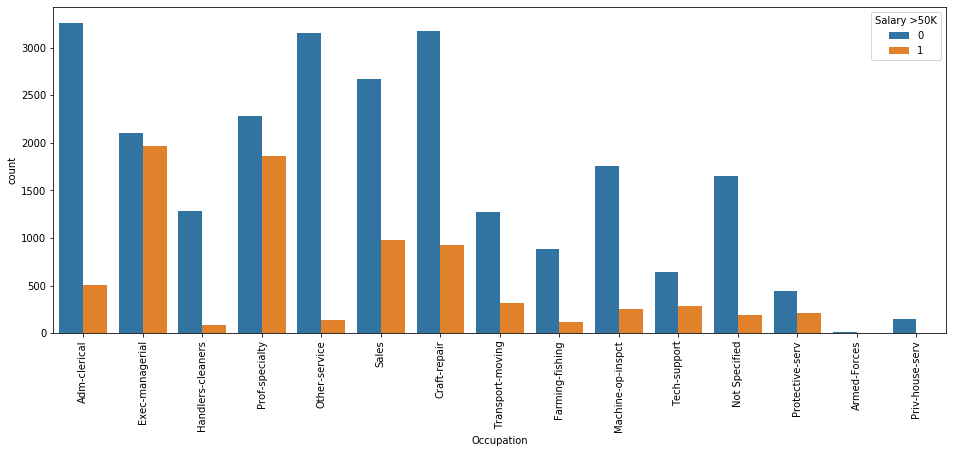

In [47]:
plt.figure(figsize=(16,6))
sns.countplot(data['Occupation'],hue=data['Salary >50K'])
plt.xticks(rotation=90)

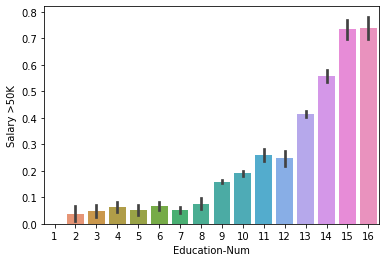

In [48]:
sns.barplot(x=data['Education-Num'],y=data['Salary >50K'])

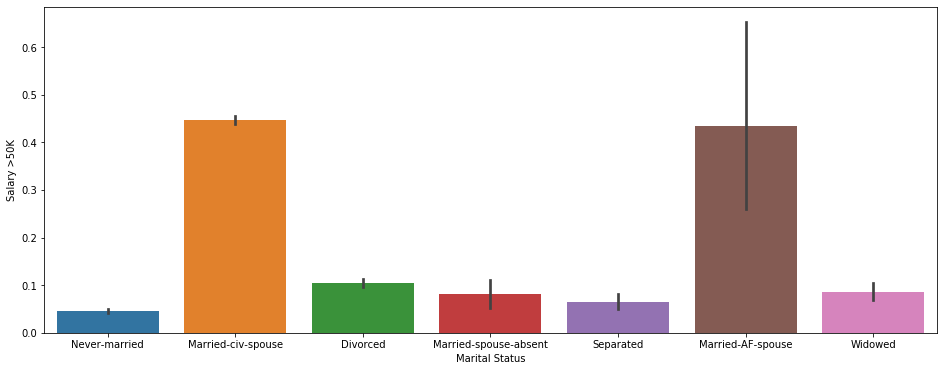

In [49]:
plt.figure(figsize=(16,6))
sns.barplot(x=data['Marital Status'],y=data['Salary >50K'])

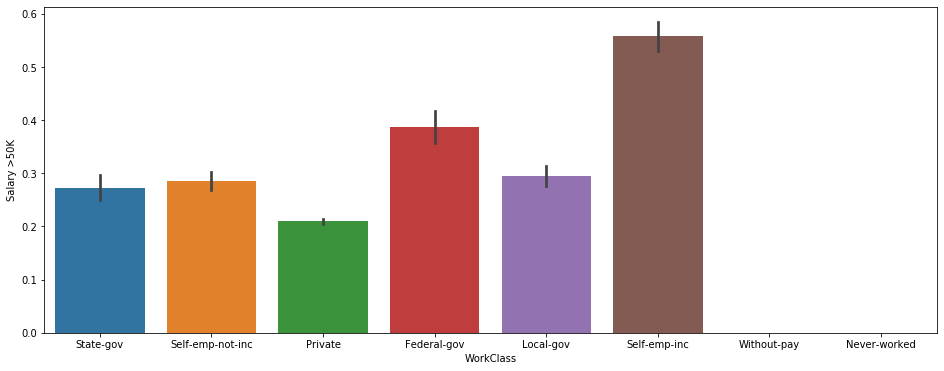

In [50]:
plt.figure(figsize=(16,6))
sns.barplot(x=data['WorkClass'],y=data['Salary >50K'])

In [51]:
#Converting the object datatype columns to binary using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in data.columns:
    if data[cols].dtypes=='object':
        data[cols]=le.fit_transform(data[cols])
        

In [52]:
data.head()

,Age,WorkClass,fnlwgt,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary >50K
0,39,6,77516,13,4,0,1,4,1,2174,0,40,39,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,39,0
2,38,3,215646,9,0,5,1,4,1,0,0,40,39,0
3,53,3,234721,7,2,5,0,2,1,0,0,40,39,0
4,28,3,338409,13,2,10,5,2,0,0,0,40,4,0


In [53]:
data.describe()

,Age,WorkClass,fnlwgt,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary >50K
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.080679,2.611836,6.468045,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,37.138079,0.240810
std,13.640433,1.107194,1.055500e+05,2.572720,1.506222,4.343388,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.423963,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


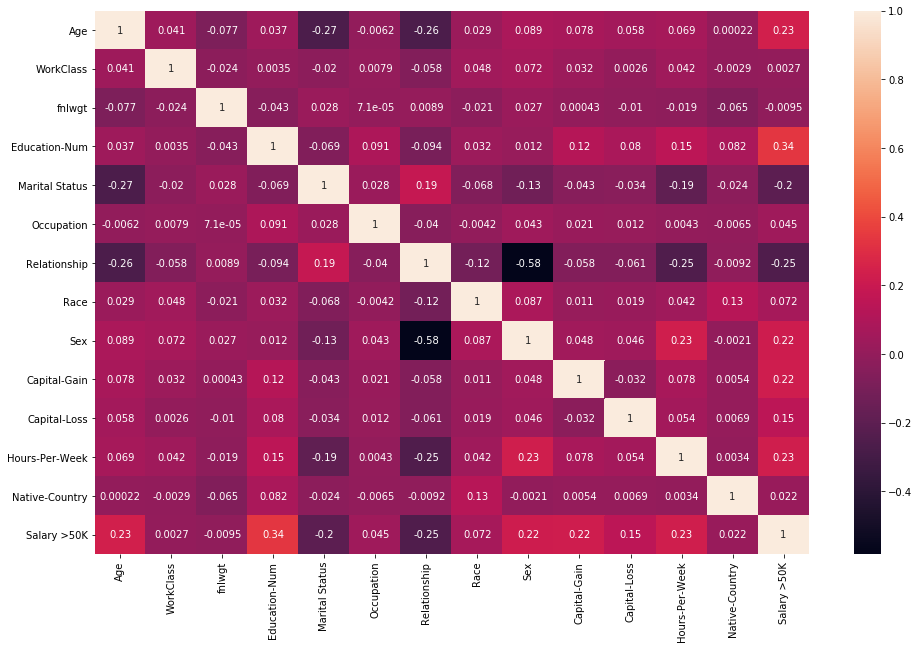

In [54]:
#Plotting the correlation -Relationship and sex are highly negatively correlated
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

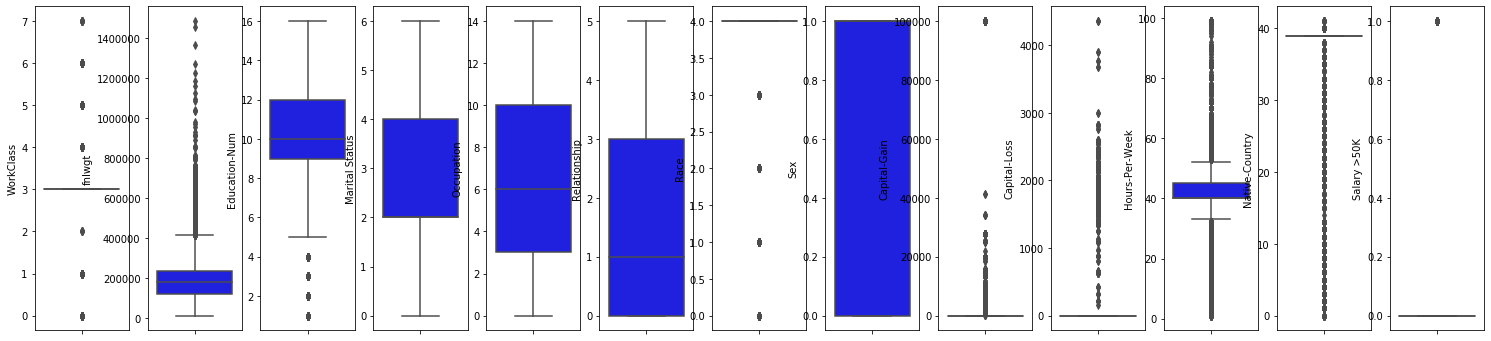

In [55]:
#Outlier detection
collist=data.columns.values
ncol=14
nrow=8
plt.figure(figsize=(2*ncol,4*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')
    

In [56]:
# As per the above box plot, outliers are present in the data, hence removing using zscore
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
print(data.shape)
data=data.loc[(z_sc<3).all(axis=1)]
print(data.shape)

(32561, 14)
(27783, 14)


In [57]:
#Splitting the attributes and target variable
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.shape)
print(y.shape)

(27783, 13)
(27783,)


In [58]:
y

0        0
1        0
2        0
3        0
5        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary >50K, Length: 27783, dtype: int32

In [59]:
y=y.values.reshape(-1,1)

In [60]:
y.shape

(27783, 1)

In [61]:
#Scaling the attributes
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(27783, 13)

In [62]:
x

array([[ 0.06329201,  2.64687383, -1.14884902, ..., -0.03720511,
         0.00650044,  0.22931774],
       [ 0.88457523,  1.73882795, -1.08762463, ..., -0.03720511,
        -2.41587818,  0.22931774],
       [-0.0113701 , -0.07726381,  0.31049946, ..., -0.03720511,
         0.00650044,  0.22931774],
       ...,
       [ 1.48187211, -0.07726381, -0.3628737 , ..., -0.03720511,
         0.00650044,  0.22931774],
       [-1.20596386, -0.07726381,  0.1609408 , ..., -0.03720511,
        -1.78785409,  0.22931774],
       [ 1.03389945,  0.83078207,  1.07415086, ..., -0.03720511,
         0.00650044,  0.22931774]])

Designing the model

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [64]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(20837, 13) (6946, 13)
(20837, 1) (6946, 1)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [66]:
lr=LogisticRegression()
gnb=GaussianNB()
knc=KNeighborsClassifier(n_neighbors=8)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=6)
rfc=RandomForestClassifier(n_estimators=200,random_state=42)

In [67]:
models =[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifer',knc))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

In [68]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    score.append(AS*100)
    print('Accuracy Score =',AS)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score =',sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report\n',classification_report(y_test,pred))
    print('\n')
    print('Confusion Matrix \n',confusion_matrix(y_test,pred))


************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score = 0.8344370860927153


Cross Val Score = 0.8292842078211289
roc-auc score = 0.6888809630682171


Classification Report
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      5388
           1       0.72      0.42      0.54      1558

    accuracy                           0.83      6946
   macro avg       0.79      0.69      0.72      6946
weighted avg       0.82      0.83      0.82      6946



Confusion Matrix 
 [[5134  254]
 [ 896  662]]
************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score = 0.81212208

In [69]:
f_result=pd.DataFrame({'Model' : Model, 'Accuracy Score': score,'Cross_Val_Score':cvs,'ROC-AUC_Curve':rocscore})
f_result

,Model,Accuracy Score,Cross_Val_Score,ROC-AUC_Curve
0,LogisticRegression,83.443709,82.928421,68.888096
1,GaussianNB,81.212208,79.955403,76.665983
2,KNeighborsClassifer,84.105960,84.389743,72.143726
3,SVC,85.128131,85.088004,72.186659
4,DecisionTreeClassifier,80.564354,80.811974,72.279005
5,RandomForestClassifier,85.430464,85.429985,75.666543


In [70]:
#From the above table, RFC is determined to be the best model as it has the best Accuracy, Cross_val and ROC-AUC Score

In [71]:
from sklearn.externals import joblib
joblib.dump(rfc,'Census_Salary_Range_Prediction.pkl')

['Census_Salary_Range_Prediction.pkl']